In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#use simplest tool available
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [5]:
test.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
dtype: bool

In [9]:
train_df['Product_Category_2'].isnull().value_counts()

False    376430
True     173638
Name: Product_Category_2, dtype: int64

In [10]:
train_df['Product_Category_3'].isnull().value_counts()

True     383247
False    166821
Name: Product_Category_3, dtype: int64

In [7]:
#handling the missing values in Product_Category_2 &3 variables
train_df['Product_Category_2'] = train_df['Product_Category_2'].fillna(train_df['Product_Category_2'].mean())
train_df['Product_Category_3'] = train_df['Product_Category_3'].fillna(train_df['Product_Category_3'].mean())

test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_2'].mean())
test['Product_Category_3'] = test['Product_Category_3'].fillna(test['Product_Category_3'].mean())

In [12]:
train_df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [13]:
train_df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [14]:
train_df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [9]:
#Product_ID variable contains PRODUCT+ID = String + NUMBER(ID), 
#So, to change the datatype removed the common string value as 'P' from the variable using pandas extrace method.
train_df['Product_ID'] = train_df['Product_ID'].str.extract('(\d+)').astype(int)

test['Product_ID'] = test['Product_ID'].str.extract('(\d+)').astype(int)

C:\Users\Maanvitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Maanvitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


In [16]:
train_df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [32]:
train_df.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,...,F,M,A,B,C,0,1,2,3,4+
0,1000001,69042,10,0,3,9.842329,12.668243,8370,1,0,...,1,0,1,0,0,0,0,1,0,0
1,1000001,248942,10,0,1,6.000000,14.000000,15200,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1000001,87842,10,0,12,9.842329,12.668243,1422,1,0,...,1,0,1,0,0,0,0,1,0,0
3,1000001,85442,10,0,12,14.000000,12.668243,1057,1,0,...,1,0,1,0,0,0,0,1,0,0
4,1000002,285442,16,0,8,9.842329,12.668243,7969,0,0,...,0,1,0,0,1,0,0,0,0,1


In [22]:
train_df.describe()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,...,F,M,A,B,C,0,1,2,3,4+
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,174744.814667,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713,0.027455,0.181178,...,0.246895,0.753105,0.268549,0.420263,0.311189,0.135252,0.352358,0.185137,0.173224,0.154028
std,1.727592e+03,102746.516956,6.522660,0.491770,3.936211,4.207852,2.271830,5023.065394,0.163405,0.385166,...,0.431205,0.431205,0.443205,0.493601,0.462980,0.341993,0.477705,0.388409,0.378441,0.360976
min,1.000001e+06,142.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,97142.000000,2.000000,0.000000,1.000000,8.000000,12.668243,5823.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,169742.000000,7.000000,0.000000,5.000000,9.842329,12.668243,8047.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,259142.000000,14.000000,1.000000,8.000000,14.000000,12.668243,12054.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.006040e+06,375436.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


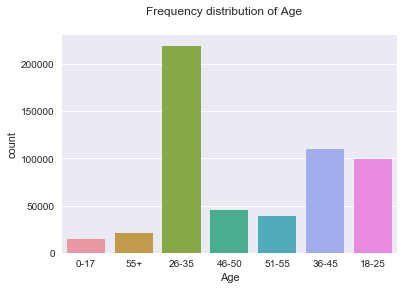

In [26]:
sns.countplot(x='Age', data=train_df)
plt.suptitle('Frequency distribution of Age')
plt.show()

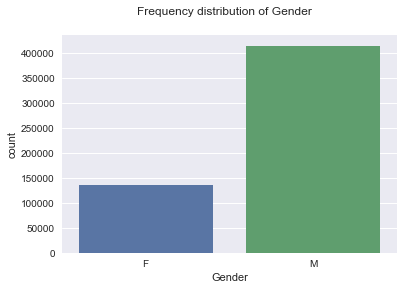

In [31]:
sns.countplot(x='Gender', data=train_df)
plt.suptitle('Frequency distribution of Gender')
plt.show()

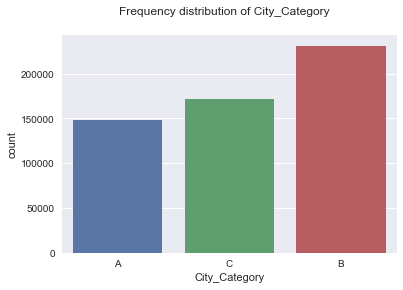

In [32]:
sns.countplot(x='City_Category', data=train_df)
plt.suptitle('Frequency distribution of City_Category')
plt.show()

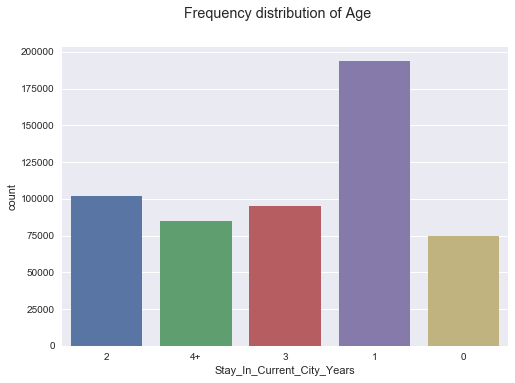

In [36]:
sns.countplot(x='Stay_In_Current_City_Years', data=train_df)
plt.suptitle('Frequency distribution of Age')
plt.show()

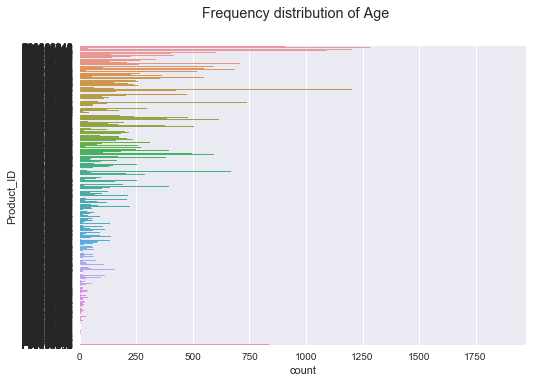

In [38]:
sns.countplot(y='Product_ID', data=train_df)
plt.suptitle('Frequency distribution of Age')
plt.show()

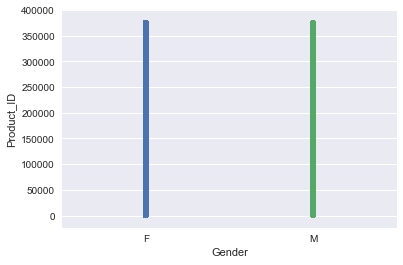

In [16]:
#kind = bar asks for a bar graph and ci=None suppresses error bars
sns.stripplot(x='Gender', y='Product_ID', data=train_df)
#plt.suptitle('Gender vs age')
plt.show()

In [23]:
train_df_copy = train_df.copy()

In [ ]:
sns.regplot(x='Age', y='Gender', data=train_df)
plt.show()

In [33]:
train_df.isnull().any()

User_ID               False
Product_ID            False
Occupation            False
Marital_Status        False
Product_Category_1    False
Product_Category_2    False
Product_Category_3    False
Purchase              False
0-17                  False
18-25                 False
26-35                 False
36-45                 False
46-50                 False
51-55                 False
55+                   False
F                     False
M                     False
A                     False
B                     False
C                     False
0                     False
1                     False
2                     False
3                     False
4+                    False
dtype: bool

In [8]:
X_train = train_df.iloc[:, 2:11].values
y_train = train_df.iloc[:, 11].values
X_test = test.iloc[:, 2:11].values

In [9]:
X_train.shape

(550068, 9)

In [10]:
X_test.shape

(233599, 9)

In [11]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_train_1 = LabelEncoder()
X_train[:, 0] = labelencoder_X_train_1.fit_transform(X_train[:, 0])
labelencoder_X_train_2 = LabelEncoder()
X_train[:, 1] = labelencoder_X_train_2.fit_transform(X_train[:, 2])
labelencoder_X_train_3 = LabelEncoder()
X_train[:, 3] = labelencoder_X_train_3.fit_transform(X_train[:, 3])
labelencoder_X_train_4 = LabelEncoder()
X_train[:, 4] = labelencoder_X_train_4.fit_transform(X_train[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [1])
X_train = onehotencoder.fit_transform(X_train).toarray()

In [12]:
X_train.shape

(550068, 29)

In [13]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_test_1 = LabelEncoder()
X_test[:, 0] = labelencoder_X_test_1.fit_transform(X_test[:, 0])
labelencoder_X_test_2 = LabelEncoder()
X_test[:, 1] = labelencoder_X_test_2.fit_transform(X_test[:, 2])
labelencoder_X_test_3 = LabelEncoder()
X_test[:, 3] = labelencoder_X_test_3.fit_transform(X_test[:, 3])
labelencoder_X_test_4 = LabelEncoder()
X_test[:, 4] = labelencoder_X_test_4.fit_transform(X_test[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [1])
X_test = onehotencoder.fit_transform(X_test).toarray()

In [14]:
X_test.shape

(233599, 29)

In [15]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

In [16]:
X_train.shape

(550068, 28)

In [17]:
X_test.shape

(233599, 28)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)